# TEAM ZM5 Climate Change Belief Analysis

<img src="https://github.com/kondi23/classification_predict/blob/main/imgs/head.PNG?raw=true" width=100% align="centre"/>

## Project Description
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

## Data Description
Data The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labeled as one of the following classes:

Class Description 2 News: the tweet links to factual news about climate change 1 Pro: the tweet supports the belief of man-made climate change 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change -1 Anti: the tweet does not believe in man-made climate change Variable definitions Columns sentiment: Sentiment of tweet message: Tweet body tweetid: Twitter unique id Files available for download train.csv - You will use this data to train your model. test.csv - You will use this data to test your model. SampleSubmission.csv - is an example of what your submission file should look like. The order of the rows does not matter, but the names of the tweetid's must be correct.

on https://www.kaggle.com/c/climate-change-belief-analysis/overview

## Table of Contents

 
1. Importing Libraries
2. Importing Dataset
3. Data Description
4. Data Cleaning
5. Exploratory Data Analysis (EDA)
6. Feature Selection
7. Model Selection and Evaluation

## Importing Libraries

In [1]:
# version control with comet 
from comet_ml import Experiment

# Other
import pandas as pd
import numpy as np
import re

# Visualisations
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Data preprocessing
import unidecode
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import text 
from sklearn import preprocessing
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
import itertools, string, operator, re, unicodedata, nltk
from nltk.tokenize import TweetTokenizer

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


# Metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics


# Classification report
from sklearn.metrics import classification_report

#Remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Comet

In [2]:
# Import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
#experiment = Experiment(
   # api_key="MmX84lLcbMa4EypyzDo2rajrp",
   # project_name="general",
   # workspace="matthewrip",
#)

In [3]:
Import comet_ml at the top of your file
 from comet_ml import Experiment

 # Create an experiment with your api key
 experiment = Experiment(
     api_key="mu4ajSSLYMPGXYMkKGUkohrs9",
     project_name="general",
     workspace="kondi23",
 )

## Importing Dataset

In [4]:
#Loading data
test_set = 'test_with_no_labels.csv'
train_set = 'train.csv'
train = pd.read_csv(train_set)
test = pd.read_csv(test_set)

In [5]:
#Spliting up index column for exporting
tweetid = test['tweetid']
test = test.drop('tweetid',axis=1)

In [6]:
#copy data for model
untouched_test = test.copy()
untouched_train = train.copy()

## Data Description

In [7]:
train

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001
15815,2,RT @washingtonpost: How climate change could b...,17856
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732


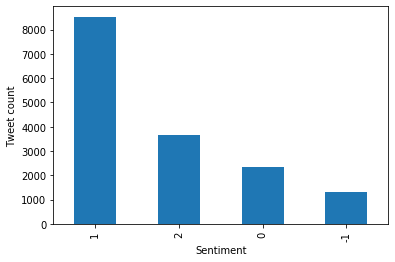

In [8]:
train['sentiment'].value_counts().plot(kind = 'bar')
plt.ylabel('Tweet count')
plt.xlabel('Sentiment')
plt.show()

As we can see there is quite data imbalance between our sentiment's. Which can lead to the model being unable to make accurate predictions for the minority sentiments. We will look as fixing this later.

In [9]:
# Creating a column of hastags
train['hashtags'] = [' '.join(re.findall(r'#\w{,}', line)) 
                       if '#' in line else np.nan for line in train.message]

In [10]:
# Creating a column of mentions
train['mention'] = [' '.join(re.findall(r"@(\w+)", line)) 
                       if '@' in line else np.nan for line in train.message]

### checking duplicate rows ...

In [11]:
#Checking duplicates
msg = train['message']
train[msg.isin(msg[msg.duplicated()])]

,sentiment,message,tweetid,hashtags,mention
10,1,RT @StephenSchlegel: she's thinking about how ...,295793,NaN,StephenSchlegel
17,1,RT @patagonia: If our elected leaders fail to ...,490604,NaN,patagonia
18,1,RT @SenSanders: We have a president-elect who ...,228658,NaN,SenSanders
21,1,RT @World_Wildlife: How climate change impacts...,690605,#COP22 #EarthToMarrakech,World_Wildlife
35,1,RT @BernieSanders: #ImVotingBecause the future...,817108,#ImVotingBecause,BernieSanders
...,...,...,...,...,...
15781,1,RT @StephenSchlegel: she's thinking about how ...,869993,NaN,StephenSchlegel
15799,1,RT @SethMacFarlane: HRC proposes installing ha...,52528,NaN,SethMacFarlane
15801,1,RT @SenSanders: On virtually every major issue...,331127,NaN,SenSanders
15811,1,RT @StephenSchlegel: she's thinking about how ...,426353,NaN,StephenSchlegel


In [12]:
#removing duplicates
train.drop_duplicates(subset = "message", keep = False, inplace = True) 

In [13]:
train.shape

(13911, 5)

## Removing noise

Removing some noise from the tweets.

In [14]:
# Replacing any hyperlinks with 'url'
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url'
train['message'] = train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)
test['message'] = test['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [15]:
# Lower case all letters
train['message'] = train['message'].str.lower()
test['message'] = test['message'].str.lower()

In [16]:
def remove_diacritics(post):
    return unidecode.unidecode(post)

In [17]:
train['message'] = train['message'].apply(remove_diacritics)
test['message'] = test['message'].apply(remove_diacritics)

In [18]:
import string
print(string.punctuation)

def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [19]:
train['message'] = train['message'].apply(remove_punctuation)
test['message'] = test['message'].apply(remove_punctuation)

### Stemmer

In [20]:
# find the stem of each word in words
stemmer = SnowballStemmer('english')

In [21]:
# Use NLTK's PorterStemmer
def stemming_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    words = [stemmer.stem(word) for word in words]
    return words

### Lemmatization

In [22]:
# nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemming_tokenizer(str_input):  
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    words = [lemmatizer.lemmatize(word) for word in words]
    return words

In [23]:
#words = train['message'].tolist()
#for x in words:
    #print(x)

## Exploratory data analysis

### Explanation of Plots 

In this section we will be exploring our data. giving insight on the tweet. previous we have added two columns namely (mentions and hash-tags), 
The mention focus more on the mentioned usernames in the tweets, mention is a Tweet that contains another person's username anywhere in the body of the Tweet, can be used to talk to or about a person, this is denoted by @ sign on the beginning of the word. 

Secondly we have hash-tags, hash-tags can be topics, a places, a name of a persona and so on, depending on the main topic, Hash-tags are for grouping conversations and categorizing content about a topic. Like mentions, you can search hash-tags, so you can view what other people are tweeting about, relative to a particular subject. this is denoted by # sign on the beginning of the name.




1. Firstly we will explore the mentions column, check the top 5 usernames that were mention and get a brief description about those users (who are these users and why they were mentioned), also checking on the sentiment against those users, this will assist on understanding how the tweeters feels about the users on the given topic. 

2. Secondly we will explore the hash-tags column, also check the top 5 topics, and get a description, this will assist us in understanding the data more, and we will again check the sentiment of those topics.

<img src="https://github.com/kondi23/classification_predict/blob/main/imgs/class.PNG?raw=true" width=70% align="centre"/>

Let us explore the first column which is the mentions 

In [24]:
# create class description for sentiments
Positive = train[train['sentiment'] == 1]
Negative = train[train['sentiment'] == -1]
Neutral = train[train['sentiment'] == 0]
news = train[train['sentiment'] == 2]

# create list of sentiment class
train['sentiment'] = [['Negative', 'Neutral', 'Positive', 'News'][x+1] for x in train['sentiment']]

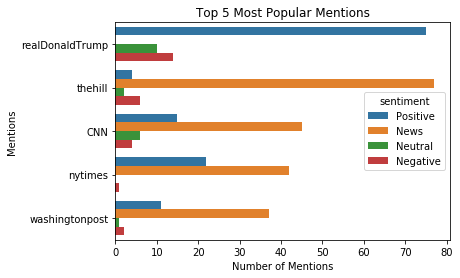

In [25]:
# popular mentions
#create countplot
sns.countplot(y="mention", hue="sentiment", data=train, order=train.mention.value_counts().iloc[:5].index) 

#plot
plt.ylabel('Mentions')
plt.xlabel('Number of Mentions')
plt.title('Top 5 Most Popular Mentions')
#show
plt.show()

<img src="https://github.com/kondi23/classification_predict/blob/main/imgs/mention.PNG?raw=true" width=70% align="left"/>

In June 2017, Donal Trump ceased all participation in the 2015 Paris Agreement saying that it will put United States in a disadvantage and it will have negative impact on the U.S economy. [President Donald Trump Withdraw](https://en.wikipedia.org/wiki/United_States_withdrawal_from_the_Paris_Agreement). Donald Trump shared his views on climate change saying he thinks it is man made and it affects the economy negatively. As usual this was tweeted on tweet with users giving their views, the sentiment shows that most tweets backed Donald Trump, with few negative followed by Neutral sentiment.

The Hill media also held a [Press](https://thehill.com/opinion/energy-environment/461660-press-trump-turns-out-light-on-climate-change-talk) about the Climate Change issue, they put in their views on the climate change and how Donald Trump is helding the issue, on the press they expressed that Donal Trump is fighting the war backwards [1](https://thehill.com/opinion/energy-environment/461660-press-trump-turns-out-light-on-climate-change-talk) 

[CNN](https://edition.cnn.com/2017/08/08/politics/trump-global-warming/index.html), [nyTimes](https://www.nytimes.com/2018/10/15/climate/trump-climate-change-fact-check.html) and [Washingtonpost](https://www.washingtonpost.com/politics/2019/12/03/its-possible-that-trump-doesnt-actually-know-what-climate-change-is/) also had their views on Donald Trump's statements of him not believing in climate change. with CNN going as far as showing that Donald Trump has less or no knowledge about climate change, they [posted 20](https://edition.cnn.com/2017/08/08/politics/trump-global-warming/index.html) of his statement that shows that he has been an aggressive critic of climate change for years "A search of the invaluable Trump Twitter Archive turns up 106 tweets in which Trump mentions "global warming" and 36 in which he used the phrase "climate change". 

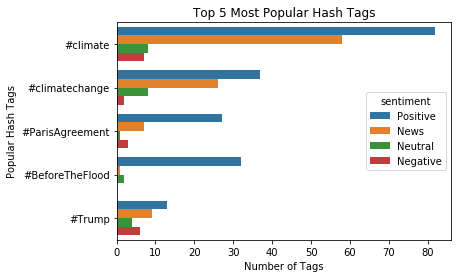

In [26]:
# popular hashtags
#create countplot
sns.countplot(y="hashtags", hue="sentiment", data=train, order=train.hashtags.value_counts().iloc[:5].index) 

#plot
plt.ylabel('Popular Hash Tags')
plt.xlabel('Number of Tags')
plt.title('Top 5 Most Popular Hash Tags')
#show
plt.show()

<img src="https://github.com/kondi23/classification_predict/blob/main/imgs/mention.PNG?raw=true" width=70% align="left"/>

This 5 top hash-tags was what we were expecting, this can cement our findings on the mentions about Donald Trump withdrawal in the Paris Agreement in 2017, but we have high positive sentiment on Paris Agreement than negative sentiment, and also looking at the climate change topic and climate topic we can see there is high positive sentiment compared to negative, so we can say most tweeters do believe in Climate Change and agrees with Paris Agreement. But let us go forward and plot a word cloud that will show more words used and their sentiment.

### Word clouds
Lets take a closer look at the words used by each of the groups.

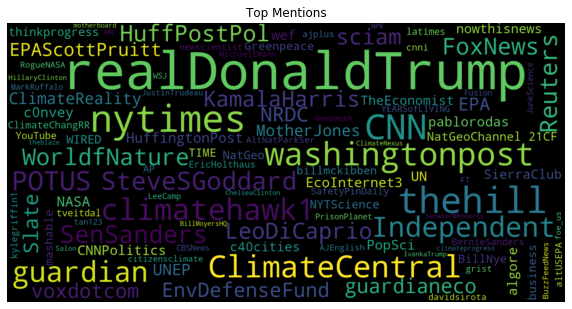

In [27]:
#Hashtag colum
hashtags = train['mention'].dropna() #drop nulls

new_tag = ' '.join([x for x in hashtags.astype(str)]) #join text in the list
new_tags = new_tag.replace("'", "")

#word cloud
word_cloud = WordCloud(width = 2000, height = 1000, background_color = "black", max_words = 100).generate(new_tags)

#Plotting
#title = 
plt.figure(figsize = (10, 7))
plt.imshow(word_cloud, interpolation = "bilinear")
plt.title('Top Mentions')
plt.axis('off')
plt.show()

Now we can see more users like Tony Heller goes by the pen-name [Steve Goddard](https://www.seattleweekly.com/news/climate-change-denier-testifies-for-40-minutes-in-washington-senate-environment-committee/), who is a climate change denier, Heller claimed climate scientists have altered or fabricated graphs and figures to fit their own theories. He accused "climate alarmists" of spreading the bad/wrong data "I see that global warming has become a distraction which has derailed the environmental movement,". The Guardian and independent media also published a story about climate change, also DiCaprio has worked to bring attention and funding to the protection of climate change.

Top Hashtags


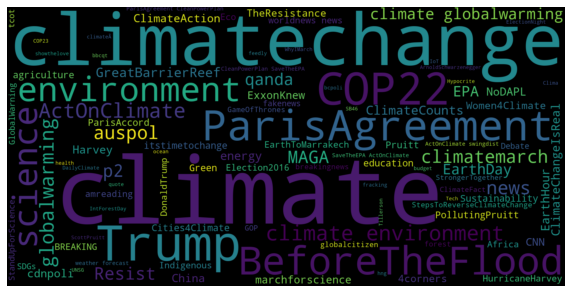

In [28]:
#Hashtag colum
hashtags = train['hashtags'].dropna() #drop nulls

new_tag = ' '.join([x for x in hashtags.astype(str)]) #join text in the list
new_tags = new_tag.replace("'", "")

#word cloud
word_cloud = WordCloud(width = 2000, height = 1000, background_color = "black", max_words = 100).generate(new_tags)

#Plotting
print('Top Hashtags')
plt.figure(figsize = (10, 7))
plt.imshow(word_cloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

### Word Cloud on Mention vs Sentiment

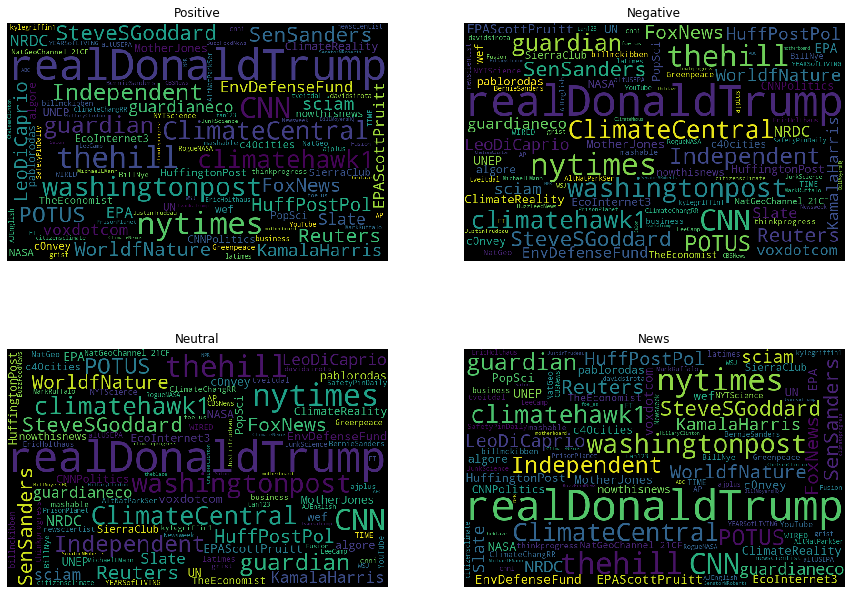

In [29]:
 #drops null values
positive = train['mention'].dropna()
neutral = train['mention'].dropna()
negative = train['mention'].dropna()
news = train['mention'].dropna()

#join list values
positive = ' '.join([val for val in positive.astype(str)])
neutral = ' '.join([val for val in neutral.astype(str)])
negative = ' '.join([val for val in negative.astype(str)])
news = ' '.join([val for val in news.astype(str)])

#create word cloud
postive_wordcloud = WordCloud(width=800, height=500, background_color="black", max_font_size =110, max_words = 100).generate(positive)
neutral_wordcloud = WordCloud(width=800, height=500, background_color="black", max_font_size =110, max_words = 100).generate(neutral)
negative_wordcloud = WordCloud(width=800, height=500, background_color="black", max_font_size =110, max_words = 100).generate(negative)
news_wordcloud = WordCloud(width=800, height=500, background_color="black", max_font_size =110, max_words = 100).generate(news)

#list of word clouds
clouds = [postive_wordcloud, neutral_wordcloud, negative_wordcloud, news_wordcloud]
title = ['Positive','Negative', 'Neutral','News'] 

#Plot word cloud
fig = plt.figure(figsize=(15,11))
for i in range(len(clouds)):
    ax = fig.add_subplot(2,2,i+1)
    wordcloud = clouds[i]
    ax.set_title(title[i])
    
    ax.imshow(wordcloud)
    ax.axis('off')

as we can see most of the mentions are across all classes, mentions like realDonaldTrump, Guardian, ClimateCentral, theHill, washingtonpost

### Word Cloud on hashtags vs Sentiment

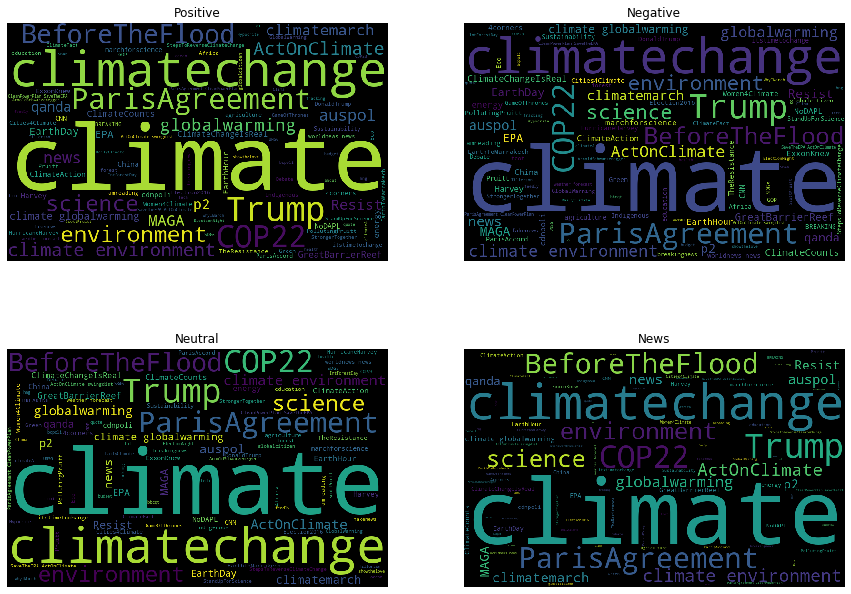

In [30]:
 #drops null values
positive = train['hashtags'].dropna()
neutral = train['hashtags'].dropna()
negative = train['hashtags'].dropna()
news = train['hashtags'].dropna()

#join list values
positive = ' '.join([val for val in positive.astype(str)])
neutral = ' '.join([val for val in neutral.astype(str)])
negative = ' '.join([val for val in negative.astype(str)])
news = ' '.join([val for val in news.astype(str)])

#create word cloud
postive_wordcloud = WordCloud(width=800, height=500, background_color="black", max_font_size =500, max_words = 100).generate(positive)
neutral_wordcloud = WordCloud(width=800, height=500, background_color="black", max_font_size =500, max_words = 100).generate(neutral)
negative_wordcloud = WordCloud(width=800, height=500, background_color="black", max_font_size =500, max_words = 100).generate(negative)
news_wordcloud = WordCloud(width=800, height=500, background_color="black", max_font_size =500, max_words = 100).generate(news)

#list of word clouds
clouds = [postive_wordcloud, neutral_wordcloud, negative_wordcloud, news_wordcloud]
title = ['Positive','Negative', 'Neutral','News'] 

#Plot word cloud
fig = plt.figure(figsize=(15,11))
for i in range(len(clouds)):
    ax = fig.add_subplot(2,2,i+1)
    wordcloud = clouds[i]
    ax.set_title(title[i])
    
    ax.imshow(wordcloud)
    ax.axis('off')

we can see that ParisAgreement was mentioned in all classes, and along with climate, climatechange, science, globalwarming and with all this we can conclude that this was based on Paris Agreement issues and Climate change that countries has to agree on.

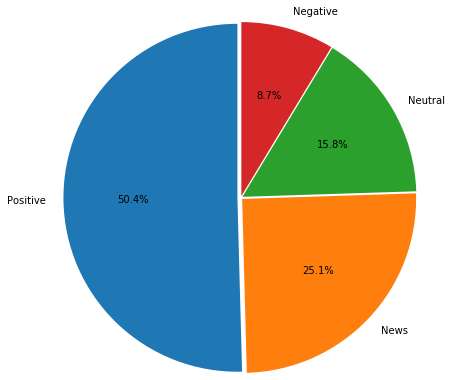

In [31]:
#plotting the pie chart
values = train['sentiment'].value_counts()/train.shape[0]
labels = (train['sentiment'].value_counts()/train.shape[0]).index
plt.pie(x=values, labels=labels, autopct='%1.1f%%', startangle=90, explode= (0.04, 0.02, 0.02, 0.02),  radius=2)
plt.show()

50.4% of the tweets are positive towards climate change, and we have least percentage that are against Climate Change

## Preping data for model training

### Splitting label and features

In [32]:
# X = features y = label
y = untouched_train['sentiment']
X = untouched_train.drop('sentiment',axis=1)

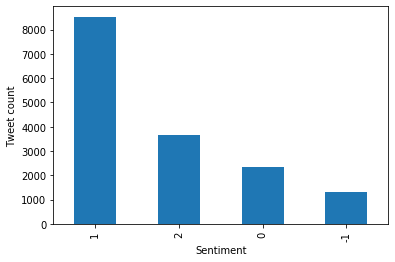

In [33]:
y.value_counts().plot(kind = 'bar')
plt.ylabel('Tweet count')
plt.xlabel('Sentiment')
plt.show()

Strange the data imbalance did not magically disappear no its own, very strange but lets move on for now.

In [34]:
# relpacing hyperlinks with 'url'
X['message'] = X['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

### Spliting data into train and testing

In [35]:
%%time
# split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=12)

Wall time: 3.99 ms


Alright with our dataset split into training and testing, lets create word vectors from the dataset.

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
# tt = TweetTokenizer()

In [38]:
# initialize the verctorizer we will be using
tfidf_vectorizer = TfidfVectorizer(strip_accents='ascii',max_features=None,ngram_range=(1,3),min_df=2)
"""
Here we are creating vectors ranging from single words to a combination of three and must
atleast have apeared twice in the dataset
"""

'\nHere we are creating vectors ranging from single words to a combination of three and must\natleast have apeared twice in the dataset\n'

In [39]:
# Fit and transform the training and testing datasets
tfidf_train = tfidf_vectorizer.fit_transform(X_train.message)
tfidf_test = tfidf_vectorizer.transform(X_test.message)

In [40]:
tfidf_train.shape

(12655, 43748)

As we can see we have just a few more dimensions to the data now.
With the data set in a format that which a model can understand lets train some models.

In [41]:
# List of model names
names = ['Logistic Regression',       
         'Decision Tree', 
         'Random Forest', 
        'Naive Bayes',
        'MLPClassifier']

In [42]:
# Basic models with very small amount of hyperparameter
classifiers = [
    LogisticRegression(C=1), 
    DecisionTreeClassifier(max_depth=50),
    RandomForestClassifier(max_depth=50, n_estimators=20),    
    MultinomialNB(alpha = 0.1),
    MLPClassifier(random_state=1,hidden_layer_sizes=(20), max_iter=10)
]

Now that we have a short list of some models lets train them and see if any handle this dataset better then others.

In [43]:
%%time
# Borrowing this nice little cell from an edsa notebook

"""
looping through list of models,
training models 
making predicts and saving the predictions into a dataframe

"""

results = []

models = {}
confusion = {}
class_report = {}

for name, clf in zip(names, classifiers):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(tfidf_train, y_train)
    
    print ('... predicting')
    y_pred = clf.predict(tfidf_train)   
    y_pred_test = clf.predict(tfidf_test)
    
    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred,average='micro')
    recall    = metrics.recall_score(y_train, y_pred,average='micro')
    
    f1        = metrics.f1_score(y_train, y_pred,average='micro')    
    f1_test   = metrics.f1_score(y_test, y_pred_test,average='micro')    
    
    # Save the results to dictionaries
    models[name] = clf    
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)
    
    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])

    
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting Naive Bayes model...
... predicting
... scoring
Fitting MLPClassifier model...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

... predicting
... scoring
... All done!
Wall time: 5min 16s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alrighty lets take look at how these models preformed.

In [44]:
results.sort_values('F1 Test', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
MLPClassifier,0.987199,0.987199,0.987199,0.987199,0.743679,31.475499
Naive Bayes,0.941367,0.941367,0.941367,0.941367,0.732617,0.009811
Logistic Regression,0.817621,0.817621,0.817621,0.817621,0.720607,0.529106
Random Forest,0.771711,0.771711,0.771711,0.771711,0.659292,0.984384
Decision Tree,0.946108,0.946108,0.946108,0.946108,0.611884,4.143801


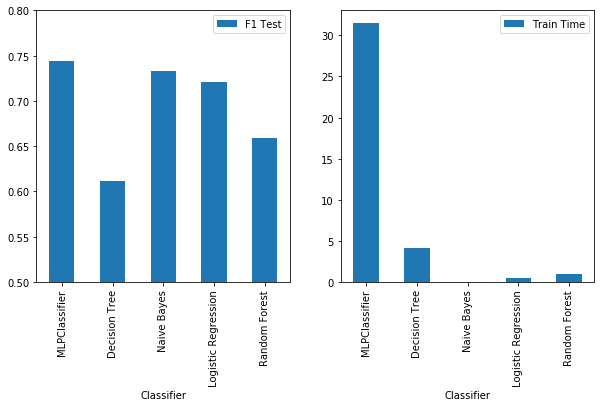

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.5,0.8])
results.plot(y='Train Time', kind='bar', ax=ax[1])

As we can see the MLPClassiffier has the highest f1 test score just beating out the Navie Bayes and Logistic Regression models and the tree based models preformed quite a bit worse. So we will continue without the tree based models.

In [46]:
confusion['MLPClassifier']

array([[ 994,   13,   17,    3],
       [   3, 1819,   25,   16],
       [   1,   11, 6800,   40],
       [   1,    2,   30, 2880]], dtype=int64)

In [47]:
print(class_report['MLPClassifier'])

              precision    recall  f1-score   support

          -1       0.99      0.97      0.98      1027
           0       0.99      0.98      0.98      1863
           1       0.99      0.99      0.99      6852
           2       0.98      0.99      0.98      2913

    accuracy                           0.99     12655
   macro avg       0.99      0.98      0.98     12655
weighted avg       0.99      0.99      0.99     12655



It appears that the MLPClassifier can explain very well how the X_train leads to y_train.

In [48]:
%%time
# Classification report test set
mlpc = MLPClassifier(random_state=1,hidden_layer_sizes=(20), max_iter=10)
mlpc.fit(tfidf_train, y_train)
print(classification_report(y_test, mlpc.predict(tfidf_test)))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

          -1       0.77      0.36      0.49       269
           0       0.56      0.46      0.50       490
           1       0.76      0.88      0.82      1678
           2       0.80      0.77      0.78       727

    accuracy                           0.74      3164
   macro avg       0.72      0.61      0.65      3164
weighted avg       0.74      0.74      0.73      3164

Wall time: 34.5 s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


When predicting using the X_test set we can see that our performance drop quite a bit, especially in the '-1' and '0' sentiments. This can be a result of the imbalance in the dataset and the model not having enough data from those two sentiments.

Now lets see if we can do something about the imbalance we in this data set.

## Data imbalance

### Smote

First lets try handling the imbalance using the 'SMOTE' method from imblearn.

In [1]:
from imblearn.over_sampling import SMOTE

In [ ]:
makeup = SMOTE(random_state=42,sampling_strategy='auto') # 
smoteX, smotey = makeup.fit_resample(tfidf_train, y_train)

Smote is an over-sampling technique which creates synthetic data point of the minority observations. If we just take the minority observations and duplicate them we stand the chance of grossly over-fitting to our dataset.

In [ ]:
names = ['Logistic Regression',
        'Naive Bayes',
        'MLPClassifier']

classifiers = [
    LogisticRegression(C=1), 
    MultinomialNB(alpha = 0.1),
    MLPClassifier(random_state=1,hidden_layer_sizes=(20), max_iter=10)
]

In [ ]:
# GO AGAIN

results = []

models = {}
confusion = {}
class_report = {}

for name, clf in zip(names, classifiers):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(smoteX, smotey)
    
    print ('... predicting')
    y_pred = clf.predict(smoteX)   
    y_pred_test = clf.predict(tfidf_test)
    
    print ('... scoring')
    accuracy  = metrics.accuracy_score(smotey, y_pred)
    precision = metrics.precision_score(smotey, y_pred,average='micro')
    recall    = metrics.recall_score(smotey, y_pred,average='micro')
    
    f1        = metrics.f1_score(smotey, y_pred,average='micro')    
    f1_test   = metrics.f1_score(y_test, y_pred_test,average='micro')    
    
    # Save the results to dictionaries
    models[name] = clf    
    confusion[name] = metrics.confusion_matrix(smotey, y_pred)
    class_report[name] = metrics.classification_report(smotey, y_pred)
    
    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])

    
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

In [ ]:
results.sort_values('F1 Test', ascending=False)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.5,0.8])
results.plot(y='Train Time', kind='bar', ax=ax[1])

In [ ]:
%%time
# Classification report test set
mlpc.fit(smoteX, smotey)
print(classification_report(y_test, mlpc.predict(tfidf_test)))

As we can see recall and f1 score for '-1' just barely improved. So lets try another method.

## Balanced Bagging

Undersampling is a very effective technique to deal with imbalanced data. However, it is not neglectable that since only small portion of the majority class is drawn for analysis, huge amount of information may be lost, leading to large test variance. In other words, it is possible that the resampled dataset is not able to be treated as training representative. To solve this problem, a bootstrap-undersampling technique, so-called Balanced Bagging is applied.

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier

In [ ]:
bbc_lrc = BalancedBaggingClassifier(LogisticRegression(C = 100, solver = 'lbfgs', max_iter = 1000), 
                                    n_estimators = 100, 
                                    replacement = True, 
                                    n_jobs=2)

bbc_nb = BalancedBaggingClassifier(MultinomialNB(alpha = 0.1), 
                                    n_estimators = 100, 
                                    replacement = True, 
                                    n_jobs=2)

bbc_mlpc = BalancedBaggingClassifier(MLPClassifier(random_state=1,hidden_layer_sizes=(20), max_iter=10), 
                                    n_estimators = 100, 
                                    replacement = True, 
                                    n_jobs=2)

In [ ]:
%%time
bbc_lrc.fit(tfidf_train, y_train)

In [ ]:
%%time
bbc_nb.fit(tfidf_train, y_train)

In [ ]:
%%time
bbc_mlpc.fit(tfidf_train, y_train)

In [ ]:
# train f1 score
pred = bbc_lrc.predict(tfidf_train)
print('train - ', round(f1_score(y_train, pred,average='micro'),4))

# test
pred = bbc_lrc.predict(tfidf_test)
print('test - ', round(f1_score(y_test, pred,average='micro'),4))

In [ ]:
# train f1 score
pred = bbc_nb.predict(tfidf_train)
print('train - ', round(f1_score(y_train, pred,average='micro'),4))

# test
pred = bbc_nb.predict(tfidf_test)
print('test - ', round(f1_score(y_test, pred,average='micro'),4))

In [ ]:
# train f1 score
pred = bbc_mlpc.predict(tfidf_train)
print('train - ', round(f1_score(y_train, pred,average='micro'),4))

# test
pred = bbc_mlpc.predict(tfidf_test)
print('test - ', round(f1_score(y_test, pred,average='micro'),4))

In [ ]:
%%time
# Classification report test set
print(classification_report(y_test, pred))

The recall socre for the minority got better when the majority class got worse But our overall f1 score has gotten worse. 

## Model Validation

### K-Fold Cross Validation

Here we will look at testing the model using cross validation to make sure our predictions are repeat able.

In [ ]:
from sklearn.model_selection import cross_val_score

Let's now do the same for each of our models and print out the mean and standard deviation of each model's cross validation.

In [ ]:
# loooooooop through models and calculate mean and standard deviation, then print it out
cv = []
for name, model in models.items():
    print ()
    print(name)
    scores = cross_val_score(model,tfidf_train, y_train, cv=10)
    print("Accuracy: {:0.2f} (+/- {:0.4f})".format(scores.mean(), scores.std()))
    cv.append([name, scores.mean(), scores.std() ])
    
cv = pd.DataFrame(cv, columns=['Model', 'CV_Mean', 'CV_Std_Dev'])
cv.set_index('Model', inplace=True)

In [ ]:
# ploting accuracy and standard deviation
cv.plot(y='CV_Mean', yerr='CV_Std_Dev',kind='bar', ylim=[0.65, 0.85])

So we can see that there is a small deviation in the models ability and model is repeatable.

## Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
%%time

# number of cross validation 
nfolds = 5

# time of times model with me trained
iters = [10,15,20] 
# hidden layers
layers = [(5,),(10,),(15),(20)]

para = {
    'hidden_layer_sizes': layers,
    'max_iter' : iters
    }

grid_mlpc = GridSearchCV(MLPClassifier(), param_grid = para, scoring='f1_micro', cv=nfolds)
grid_mlpc.fit(tfidf_train, y_train)

In [ ]:
best_param = grid_mlpc.best_params_

In [ ]:
param_grid

In [ ]:
mlpc = MLPClassifier(hidden_layer_sizes=(15,),max_iter=10,random_state=1)

In [ ]:
%%time
mlpc.fit(tfidf_train, y_train)

In [ ]:
# train f1 score
pred = mlpc.predict(tfidf_train)
print('train - ', round(f1_score(y_train, pred,average='micro'),4))

# test
pred = mlpc.predict(tfidf_test)
print('test - ', round(f1_score(y_test, pred,average='micro'),4))

## Preping Test Data for predictions

In [ ]:
# word vector test data
tests = tfidf_vectorizer.transform(test.message)

In [ ]:
# sub = nb.predict(tests)
sub = mlpc.predict(tests)

In [ ]:
submission = pd.DataFrame(
    {'tweetid': tweetid,
     'sentiment': sub
    })

In [ ]:
# create csv file for submission
submission.to_csv("submission.csv", index=False)

In [ ]:

unique, counts = np.unique(sub, return_counts=True)
plt.bar(unique,counts)
plt.show()

## Pickle

Pickling model and vectorizer.

In [ ]:
import pickle

model_save_path = "model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(mlpc,file)

In [ ]:
model_save_path = "tfidf_vectorizer.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(tfidf_vectorizer,file)

### Ending experiment

Saving scores and params with comet.

In [ ]:
# Saving each metric to add to a dictionary for logging

f1 = f1_score(y_test, pred,average='micro')
precision = precision_score(y_test, pred,average='micro')
recall = recall_score(y_test, pred,average='micro')

In [ ]:
# templete

# Create dictionaries for the data we want to log

params = {"random_state": 1,
          "model_type": "MLPClassifier",
          "param_grid": str(param_grid),
          }
metrics = {"f1": f1,
           "recall": recall,
           "precision": precision
           }

In [ ]:
experiment.log_metrics(metrics)
experiment.log_parameters(params)

In [ ]:
experiment.end()